In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [11]:
from sklearn.datasets import load_breast_cancer

In [12]:
cancer = load_breast_cancer()

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [16]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PCA Visualization
As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [17]:
from sklearn.preprocessing import StandardScaler # mean = 0 and std = 1

#formula =(xi - mean)/std

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(df)

StandardScaler()

In [20]:
scaled_df = scaler.transform(df) #we need to rescale in the same unit

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [21]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components = 2) #convert 30 features into 2 features

##here we can give the any no for n_components like 3, 4, etc

In [25]:
pca.fit(scaled_df)

PCA(n_components=2)

In [27]:
X_pca = pca.transform(scaled_df)

In [30]:
X_pca.shape #here our features are successfuly converted

(569, 2)

In [29]:
scaled_df.shape 

(569, 30)

Text(0, 0.5, 'Second Principal components')

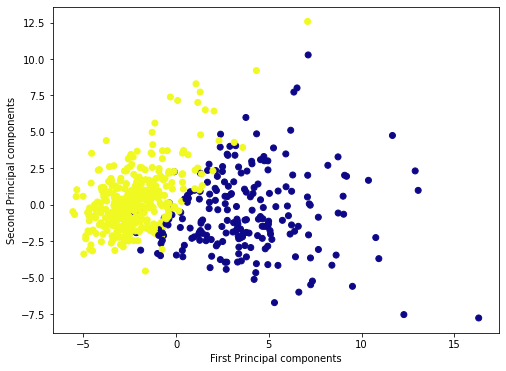

In [32]:
plt.figure(figsize = (8,6)) #8 is width and 6 is length
plt.scatter(X_pca[:,0],X_pca[:,1], c = cancer['target'], cmap ='plasma')
plt.xlabel('First Principal components')
plt.ylabel('Second Principal components')

In [35]:
#X_pca = independent features (X)
#cancer['target'] = dependent feature (y)

X = X_pca
y = cancer['target']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
#train multinomial/multiple logistic Regression

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

In [40]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [41]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9385964912280702

In [46]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep )

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        49
           1       0.94      0.95      0.95        65

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [47]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[45,  4],
       [ 3, 62]], dtype=int64)

# KNN 

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = K